## 모델 불러오기

In [1]:
## 라이브러리 설치
##pip install trimesh

In [2]:
import trimesh
model = trimesh.load('./obj/model.stl')
model.show()

In [3]:
## 모델 내 중복된 꼭지점 합치기
## trimesh에서는 필요없음
model.merge_vertices()
# 변수에 저장
vertices = model.vertices

## 시각화

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# plt.scatter(vertices[:,0], vertices[:,1])
# plt.scatter(vertices[:,0], vertices[:,2])
# plt.scatter(vertices[:,1], vertices[:,2])

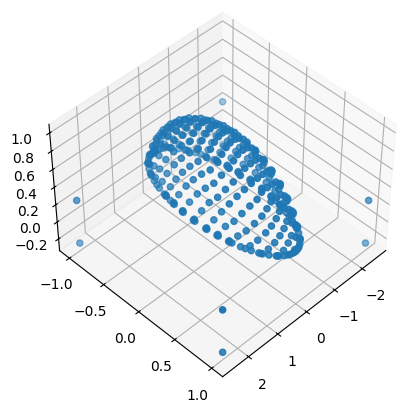

In [6]:
## 꼭지점 scatter
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=45, azim=45)
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2])


## 샘플 추출
https://trimesh.org/trimesh.sample.html

In [7]:
##sample_surface_even()은 샘플들이 서로 가까이 붙지않도록 배치
samples = trimesh.sample.sample_surface_even(model, 300)
points = samples[0]
points

TrackedArray([[-7.96431855e-01,  1.86782417e-01, -2.50000000e-01],
              [-5.45018104e-01, -6.61122466e-01,  5.11914487e-01],
              [ 1.00519945e+00, -1.00000000e+00, -1.16594367e-03],
              [-2.50000000e+00, -8.00258622e-01, -2.49827698e-01],
              [-2.26463468e+00, -4.55153768e-02,  2.50000000e-01],
              [-4.67806532e-01,  3.49363227e-01, -2.50000000e-01],
              [-4.30758253e-01, -1.00000000e+00,  2.05594433e-01],
              [ 2.50000000e+00,  2.59899451e-01, -1.19458880e-01],
              [-1.46754329e+00,  4.28223497e-01, -2.50000000e-01],
              [ 9.25689281e-01, -5.34872126e-02, -2.50000000e-01],
              [ 2.02637199e+00, -2.08351433e-01,  2.50000000e-01],
              [-2.06516758e+00,  7.36555668e-01,  2.50000000e-01],
              [ 2.85428176e-01,  1.60434508e-01, -2.50000000e-01],
              [ 1.19826424e+00,  9.14026856e-01,  2.50000000e-01],
              [ 1.49638618e+00, -6.39470087e-01,  2.50000000e-

In [8]:
## 거리상관 없이 임의의 점을 샘플링 할 때,

# import random
# import pandas as pd
# 
# sample_rand = trimesh.sample.sample_surface_even(model, 1000)
# points_rand = list(sample_rand[0])
# points_res = random.sample(points_rand, 100)
# 
# df_test = pd.DataFrame(points_res)
# df_test.to_csv('../3D/data/test.csv', index=False)

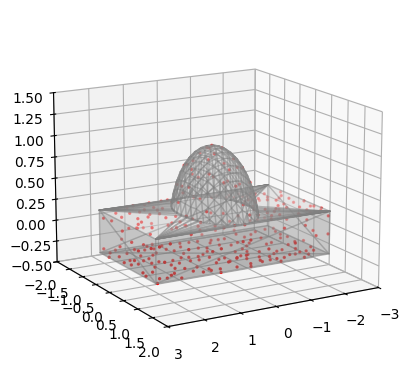

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

## 점들 표시
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', s=2)
## mesh 표현
ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha= 0.3, edgecolor='gray')

## 보이는 각도 조정
ax.view_init(elev=15, azim=60)

## 축 크기 조정
plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

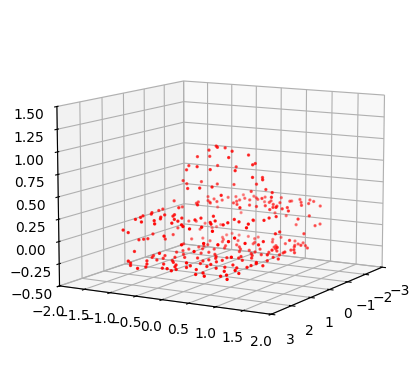

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot_trisurf(vertices[:, 0], vertices[:, 1], vertices[:, 2], triangles=model.faces, color='white', alpha=0.5, edgecolor='gray', zorder=1)
ax.scatter(points[:, 0], points[:, 1], points[:, 2], color='red', zorder=1, s=2)

ax.view_init(elev=10, azim=30)

plt.axis([-3, 3, -2, 2, -0.5,1.5])
plt.show()

## 확률 밀도 함수 추정
### scipy 내 parzen method는 1차원 윈도우만 생성
https://sebastianraschka.com/Articles/2014_kernel_density_est.html

## 데이터 CSV로 저장

In [11]:
import pandas as pd

In [12]:
df = pd.DataFrame(points)

In [13]:
df

,0,1,2
0,-0.796432,0.186782,-0.250000
1,-0.545018,-0.661122,0.511914
2,1.005199,-1.000000,-0.001166
3,-2.500000,-0.800259,-0.249828
4,-2.264635,-0.045515,0.250000
...,...,...,...
295,-0.828547,0.419996,0.362086
296,-0.879899,0.191869,0.425929
297,1.969537,-0.570844,0.250000
298,-0.694680,-0.672070,-0.250000


In [14]:
# df.to_csv("../3D/data/points.csv", index=False)

## 데이터 호출

In [15]:
## 불러온 값은 함수값이 아님!! 밀도값임!
## 밀도값 -> 함수값으로 변환 필요
dens = pd.read_csv("../3D/data/density.csv")
# dens
# type(dens)

In [16]:
total = dens.sum().sum()

In [17]:
pdf = dens/total
# pdf
# type(pdf)
pdf.sum().sum()

0.9999999999999999

 H[X] = –∫S p(x) log p(x)dx = –E{log p(X)}
 
When we have a sufficient number of points sampled from p, we can approximate
the expectation by the sample mean [8], which gives  H[X] = -(1/N) sigma log p(x). 


![01](./obj/img01.png)
    
![02](./obj/img02.png)


In [18]:
enp = np.log2(pdf).sum().sum()
enp

-19433861.317082167

https://github.com/cran/misc3d/blob/master/R/kde3d.R

## 점들의 위치 재조정하기

### 표면 위의 점인지 확인

### 점 위치 조정 > 표면 위 점인지 확인하는 작업 필요할 듯


표면에서 tangent vector를 따라 이동하고,
gradient descent와 Euler method를 적용


In [19]:
len(points)

300

In [20]:
# from scipy.spatial import cKDTree
# 
# tree = cKDTree(points)
# d, index = tree.query(points[0], k=2)
# d[1], index[1]

In [21]:
from scipy.spatial import cKDTree

# 점 집합 복사본
copyPoints = points.copy()

# 0본 인덱스를 시작으로 가까운 점 정렬
sort_neighbor = []
sort_neighbor.append(points[0])

# 정렬한 리스트로 들어간 점들은 삭제
copyPoints = np.delete(copyPoints, 0, axis=0)

while copyPoints.size > 0:
    # kdree 사용
    tree = cKDTree(copyPoints)
    d, index = tree.query(sort_neighbor[-1], k=1)
    
    # 가까운 점 추가
    sort_neighbor.append(copyPoints[index])
    
    # 정렬한 리스트로 들어간 점들은 삭제
    copyPoints = np.delete(copyPoints, index, axis=0)

# # 정렬된 점들을 numpy 배열로 변환
sorted_points = np.array(sort_neighbor)

# 차분을 통해 탄젠트 벡터 계산
tangent_vectors = np.diff(sorted_points, axis=0)

# 단위 벡터로 표준화 (길이가 1인 벡터)
tangent_vectors_normalized = tangent_vectors / np.linalg.norm(tangent_vectors, axis=1)[:, np.newaxis]

In [22]:
normals = []
num_points = len(sorted_points) - 2

for i in range(num_points):
    # 세 개의 인접한 점을 선택 (간단히 인덱스를 기준으로 선택)
    p1 = np.array(sorted_points[i])
    p2 = np.array(sorted_points[(i + 1)])  # 다음 점
    p3 = np.array(sorted_points[(i + 2)])  # 다다음 점
    
    # 법선 벡터 계산
        # 벡터 v1 = p2 - p1, v2 = p3 - p1
    v1 = np.subtract(p2, p1)
    v2 = np.subtract(p3, p1)
    
    # 벡터곱 (크로스 곱)으로 법선 벡터 계산
    normal = np.cross(v1, v2)
    
    # 정규화 (길이 1로 만들기)
    norm = np.linalg.norm(normal)
    if norm != 0:
        normal = normal / norm
    
    normals.append(normal)

In [23]:
# tvec = np.diff(normals)
normals = np.array(normals)
normals

array([[ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00, -0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00, -1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 3.14114946e-03,  1.32696655e-01,  9.91151719e-01],
       [-8.40243422e-01,  1.16690617e-01,  5.29503817e-01],
       [-6.58415224e-01, -6.27957967e-01,  4.14919492e-01],
       [-1.45758923e-01,  7.73004187e-01, -6.17429237e-01],
       [-3.31561746e-02,  1.75837343e-01, -9.83860710e-01],
       [ 6.62026000e-01,  3.74726597e-01,  6.49077463e-01],
       [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
       [ 2.10352761e-01,  5.49579071e-01

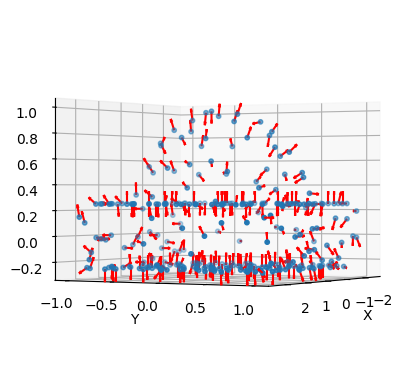

In [24]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 법선 벡터 시각화
for i, normal in enumerate(normals):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              normal[0], normal[1], normal[2], color='red', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
ax.view_init(elev=0, azim=30)

# 플롯 보여주기
plt.show()

In [25]:
# sort_neighbor
# tangent_vectors

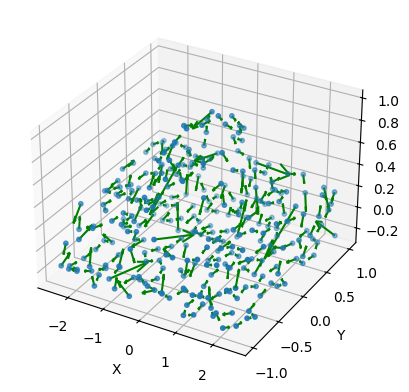

In [26]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, label="Points")

# 각 점에서 탄젠트 벡터 그리기
# for i in range(len(tangent_vectors_normalized)):
#     ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
#               tangent_vectors_normalized[i, 0], tangent_vectors_normalized[i, 1], tangent_vectors_normalized[i, 2],
#               length=0.1, color='r')
    
# 각 점에서 탄젠트 벡터 그리기
for i in range(len(tangent_vectors)):
    ax.quiver(sorted_points[i, 0], sorted_points[i, 1], sorted_points[i, 2],
              tangent_vectors[i, 0], tangent_vectors[i, 1], tangent_vectors[i, 2],
              length=0.5, color='g')

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

## 이동시키는 법
### 벡터에 스칼라값 곱해서
점 위치를 동일하게 떨어뜨리기 필요

In [27]:
## 점 이동 시키기
point_moved = sorted_points.copy()
point_moved[1:] = point_moved[1:] + 0.5 * tangent_vectors
point_moved

array([[-0.79643185,  0.18678242, -0.25      ],
       [-0.82974334, -0.0833467 , -0.25      ],
       [-1.15763887, -0.15430618, -0.25      ],
       [-1.33460755, -0.29139092, -0.25      ],
       [-0.87842346, -0.42216742, -0.25      ],
       [-0.60933481, -0.23891645, -0.25      ],
       [-0.34792346, -0.4348188 , -0.25      ],
       [-0.30572758, -0.66211005, -0.25      ],
       [-0.5757739 , -0.76598416, -0.25      ],
       [-0.78955539, -0.657949  , -0.25      ],
       [-0.96889671, -0.66557876, -0.25      ],
       [-0.90460316, -1.16612876, -0.18318949],
       [-0.68646136, -1.        ,  0.12635794],
       [-0.79535877, -0.72673612,  0.36712396],
       [-0.50460942, -0.76546352,  0.25      ],
       [-0.347552  , -1.10854148,  0.18339165],
       [-0.09450376, -1.        , -0.13736805],
       [ 0.14215378, -1.        , -0.11377888],
       [ 0.12135307, -0.66918412, -0.3332325 ],
       [-0.26981989, -0.74851699, -0.25      ],
       [-0.65668308, -1.12058499, -0.222

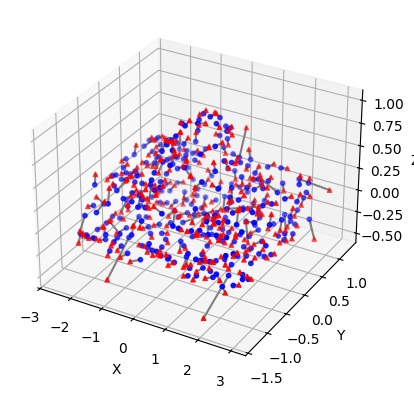

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(point_moved[:, 0], point_moved[:, 1], point_moved[:, 2], marker='^', s=10, color="red")
ax.scatter(sorted_points[:, 0], sorted_points[:, 1], sorted_points[:, 2], marker='o', s=10, color="blue")

# 같은 인덱스끼리 선으로 연결
for i in range(len(points)):
    ax.plot([sorted_points[i, 0], point_moved[i, 0]], 
            [sorted_points[i, 1], point_moved[i, 1]], 
            [sorted_points[i, 2], point_moved[i, 2]], color="gray", linestyle="-")

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
# ax.view_init(elev=30, azim=60)

# 플롯 보여주기
plt.show()

점들의 법선벡터 구하고 법선벡터의 수직인 벡터 차분

In [29]:
import open3d as o3d
import numpy as np

# 이미 추출된 점들을 numpy 배열로 변환
# points = np.array([[x1, y1, z1], [x2, y2, z2], ...])  # 추출된 표면의 점들

# 포인트 클라우드 생성
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(points)

# 법선 벡터 계산 (k-인접한 이웃을 통해 법선 추정)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamKNN(knn=50))

# 계산된 법선 벡터 출력
normals = np.asarray(pcd.normals)
print(normals)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[[ 2.78946850e-01 -2.39731216e-02  9.60007263e-01]
 [-3.36706027e-01 -7.09239733e-01  6.19361004e-01]
 [-5.44031774e-02  1.93395457e-01 -9.79611398e-01]
 [ 8.89062083e-02  8.93770991e-02 -9.92021885e-01]
 [ 1.74165736e-01  1.02399881e-01 -9.79377640e-01]
 [ 2.37214147e-01 -1.98577506e-01  9.50945016e-01]
 [ 6.36211374e-02  9.30365654e-01 -3.61070768e-01]
 [ 5.95592428e-02  2.03615993e-02 -9.98017085e-01]
 [ 9.08575002e-02  4.43971057e-02  9.94873767e-01]
 [-1.41762856e-01  8.41902387e-02  9.86313995e-01]
 [ 1.67812124e-01 -1.88878460e-02  9.85638037e-01]
 [ 1.26955683e-02 -1.09558997e-01 -9.93899215e-01]
 [-2.17277943e-01 -1.09659517e-01  9.69930454e-01]
 [-1.27081163e-01 -2.85709717e-01 -9.49852797e-01]
 [-8.85410463e-02  2.08609568e-01 -9.73982819e-01]
 [ 1.61423439e-01  1.83590973e-01 -9.69658099e-01]
 [ 5.82897816e-

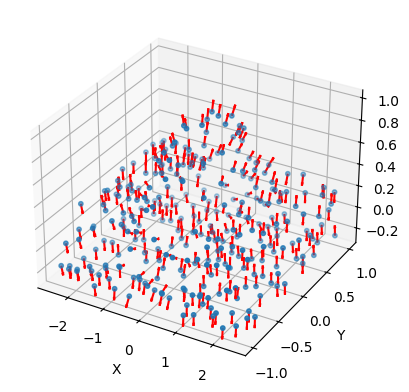

In [30]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 점 그리기
ax.scatter(points[:, 0], points[:, 1], points[:, 2], marker='o', s=10, label="Points")

# 법선 벡터 시각화
for i, normal in enumerate(normals):
    ax.quiver(points[i, 0], points[i, 1], points[i, 2],
              normal[0], normal[1], normal[2], color='red', length=0.1)

# 제목 설정 및 축 라벨
ax.set_xlabel('X')
ax.set_ylabel('Y')  
ax.set_zlabel('Z')
# ax.view_init(elev=0, azim=120)

# 플롯 보여주기
plt.show()